In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [2]:
# Load the dataset
airline=pd.read_excel("Airlines+Data.xlsx")
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [10]:
airline.rename(columns={'Month':'Date'},inplace = True)

In [11]:
airline.shape

(96, 2)

In [12]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [13]:
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


# Visualisation

<AxesSubplot:>

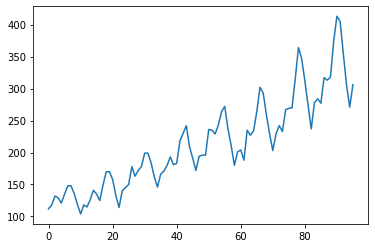

In [14]:
airline['Passengers'].plot()

C:\Users\Rohith Challam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

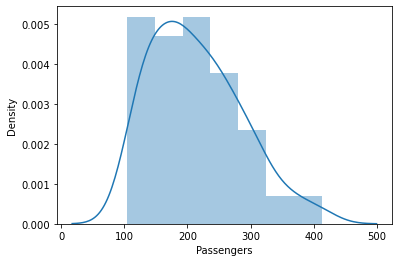

In [15]:
# distplot
sns.distplot(airline['Passengers'])

<AxesSubplot:>

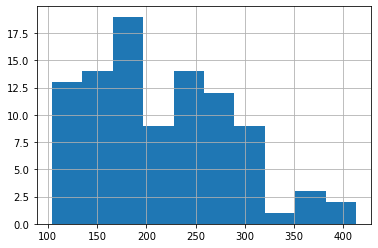

In [16]:
# histogram
airline['Passengers'].hist()

In [17]:
airline['year'] = airline['Date'].dt.strftime('%Y')
airline['month'] = airline['Date'].dt.strftime('%b')
airline['date'] = airline['Date'].dt.strftime('%d')
airline 

,Date,Passengers,year,month,date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


<AxesSubplot:xlabel='month', ylabel='year'>

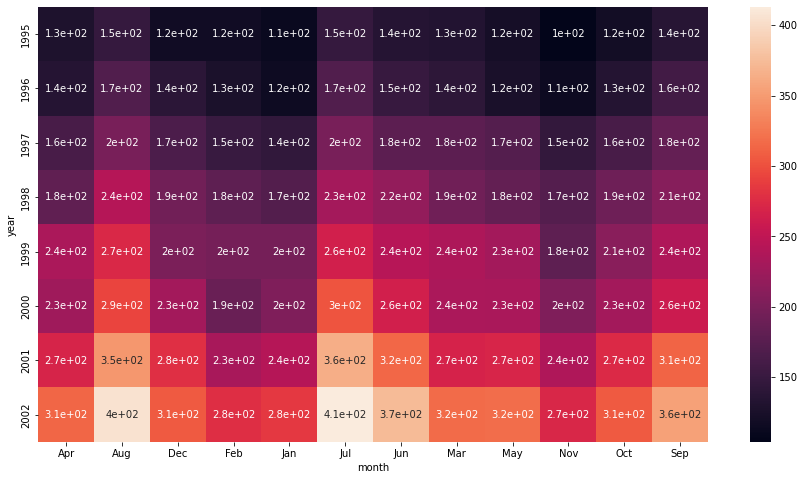

In [18]:
# heatmap of pivot table
airline_table = pd.pivot_table(data=airline,index='year',columns='month',values = 'Passengers',aggfunc='mean',fill_value=0)
plt.figure(figsize=(15,8))
sns.heatmap(data=airline_table,annot = True) 

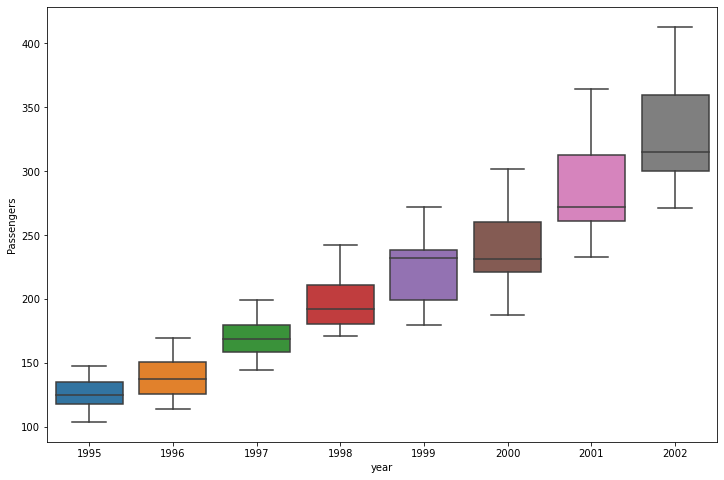

In [19]:
# boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x = 'year', y = 'Passengers',data = airline)
plt.show()

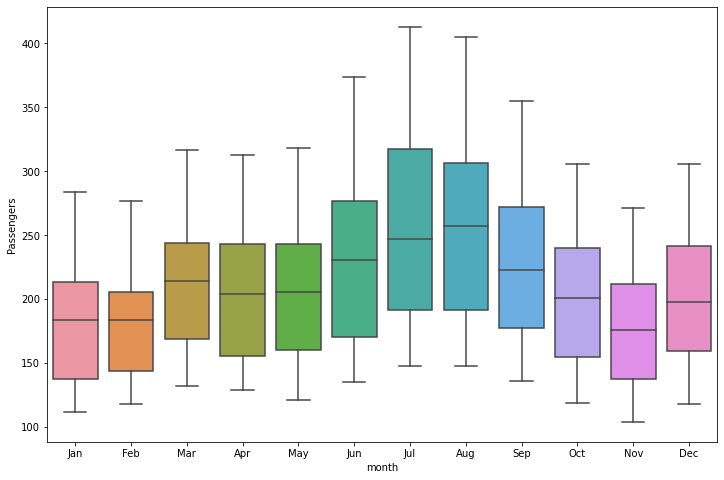

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'Passengers',data = airline)
plt.show()

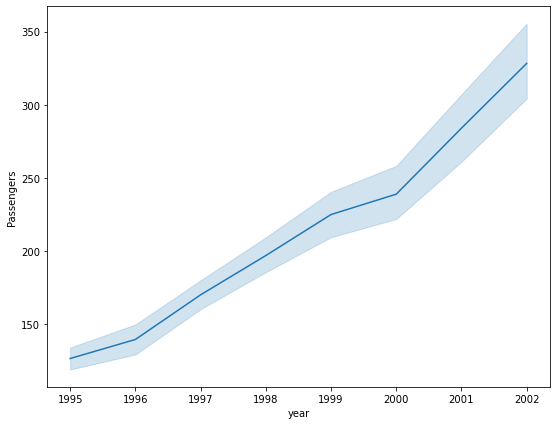

In [21]:
# Lineplot
plt.figure(figsize=(9,7))
sns.lineplot(x = 'year', y = 'Passengers',data = airline)
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

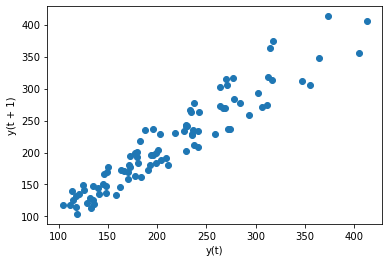

In [41]:
# lag plt
# Lagplot
from pandas.plotting import lag_plot
lag_plot(airline['Passengers'])

In [22]:
airline['t']= np.arange(0,96)
airline['t_square'] = airline['t']*airline['t']
airline['log_passangers'] = np.log(airline['Passengers']) 

In [23]:
airline.sample(10)

,Date,Passengers,year,month,date,t,t_square,log_passangers
35,1997-12-01,166,1997,Dec,01,35,1225,5.111988
21,1996-10-01,133,1996,Oct,01,21,441,4.890349
7,1995-08-01,148,1995,Aug,01,7,49,4.997212
73,2001-02-01,233,2001,Feb,01,73,5329,5.451038
80,2001-09-01,312,2001,Sep,01,80,6400,5.743003
34,1997-11-01,146,1997,Nov,01,34,1156,4.983607
83,2001-12-01,278,2001,Dec,01,83,6889,5.627621
38,1998-03-01,193,1998,Mar,01,38,1444,5.262690
37,1998-02-01,180,1998,Feb,01,37,1369,5.192957
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887


In [25]:
# dummy variables for month column
month_dummies = pd.get_dummies(airline['month'])

In [26]:
airline_1 = pd.concat([airline,month_dummies] ,axis = 1)
airline_1

,Date,Passengers,year,month,date,t,t_square,log_passangers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


# Time Series Decompostionplot

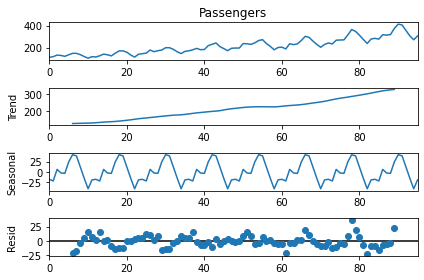

In [27]:
# Additive seasonal decompostionplot
decompose_ts_add = seasonal_decompose(airline.Passengers,period=12,model='additive')
decompose_ts_add.plot()
plt.show() 

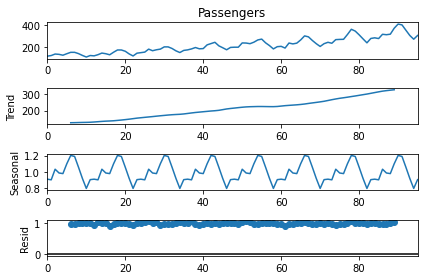

In [29]:
decompose_ts_ms= seasonal_decompose(airline.Passengers,period=12,model='multiplicative')
decompose_ts_ms.plot()
plt.show() 

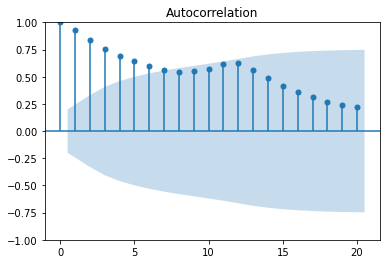

In [30]:
# ACF plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(airline['Passengers']) 

C:\Users\Rohith Challam\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


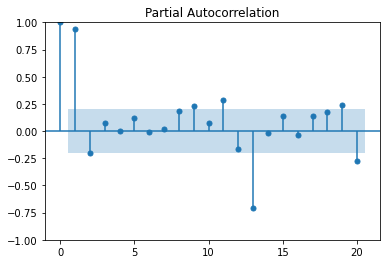

In [31]:
#pacf plot
pacf=plot_pacf(airline.Passengers)

# Moving average

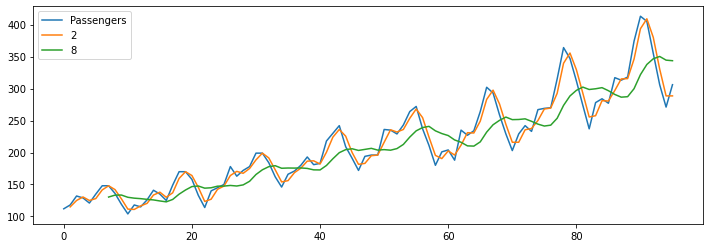

In [35]:
#Smoothening of the graph
plt.figure(figsize=(12,4))
airline_1['Passengers'].plot()
for i in range(2,12,6):
    airline_1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

In [40]:
# Spliting dataset into Train and Test
Train=airline_1.head(76)
Test=airline_1.tail(20)

In [42]:
# giving def for ERROR
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

In [44]:
#Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()                                                              #Fit the train model
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                              #predict on test data   
mae_linear = MAE(Test['Passengers'],pred_linear)                                                                     
mae_linear

0.15177815113709933

In [48]:
#Exponential
Exp = smf.ols('log_passangers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
mae_Exp = MAE(Test['Passengers'], np.exp(pred_Exp))
mae_Exp

0.12279124387308502

In [50]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t','t_square']]))
mae_Quad = MAE(Test['Passengers'],pred_Quad)
mae_Quad

0.15860152065684027

In [51]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
mae_add_sea = MAE(Test['Passengers'],pred_add_sea)
mae_add_sea

0.6838935109925582

In [54]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','t','t_square']]))
mae_add_sea_quad = MAE(Test['Passengers'], pred_add_sea_quad)
mae_add_sea_quad

0.10840984619377192

In [55]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_passangers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
mae_Mult_sea = MAE(Test['Passengers'], np.exp(pred_Mult_sea))
mae_Mult_sea

0.7336432528168294

In [56]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_passangers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
mae_Mult_add_sea = MAE(Test['Passengers'], np.exp(pred_Mult_add_sea))
mae_Mult_add_sea 

0.02549720929440008

# Forecasting on Data based methods

In [57]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_ses = MAE(pred_ses,Test['Passengers']) 
MAE_ses

0.2042662205955791

In [58]:
# Holt method with Additive trend
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_hw = MAE(pred_hw,Test['Passengers']) 
MAE_hw

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_8492\751676139.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


0.12962869135424754

In [59]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_add_add = MAE(pred_hwe_add_add,Test['Passengers']) 
MAE__hwe_add_add

0.08723908971234984

In [60]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_mul_add = MAE(pred_hwe_mul_add,Test['Passengers'])
MAE__hwe_mul_add

0.09375570323601089

# ARIMA Model for Time Series Forecasting

In [61]:
from pmdarima import auto_arima
model_fit=auto_arima(airline['Passengers'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=1,seasonal=True,d=2,D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=691.146, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=646.773, Time=0.11 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=649.949, Time=0.05 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=648.765, Time=0.25 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=648.766, Time=0.27 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=647.161, Time=0.17 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=2.09 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=684.807, Time=0.09 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=643.667, Time=0.18 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=646.811, Time=0.06 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=645.666, Time=0.33 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=645.667, Time=0.35 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=64

In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(5, 2, 0)x(1, 1, 0, 12)   Log Likelihood                -307.287
Date:                            Sun, 13 Nov 2022   AIC                            628.574
Time:                                    17:04:09   BIC                            645.421
Sample:                                         0   HQIC                           635.338
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0125      0.102     -9.912      0.000      -1.213      -0.812
ar.L2         -0.7313      0.135     -5.415      0.000      -0.996      -0.467
ar.L3         -0.6861      0.139     -4.935      0.000      -0.959      -0.414
ar.L4         -0.5879      0.134     -4.392      0.000      -0.850      -0.326
ar.L5         -0.2960      0.104     -2.853      0.004      -0.499      -0.093
ar.S.L12      -0.2214      0.091     -2.433      0.015      -0.400      -0.043
sigma2       102.4919     17.774      5.766      0.000      67.656     137.328
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.77   Prob(JB):                         0.41
Heteroskedasticity (H):               1.48   Skew:                             0.36
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 Note : we can clearly observe (p,d,q) values are (5,2,0)

In [63]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

In [64]:
# Fit a SARIMAX(5,2,0)x(1, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sari=SARIMAX(train['Passengers'],order=(5,2,0),seasonal_order=(1,1,0,12))
result=model_sari.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(5, 2, 0)x(1, 1, 0, 12)   Log Likelihood                -264.784
Date:                            Sun, 13 Nov 2022   AIC                            543.567
Time:                                    17:05:00   BIC                            559.307
Sample:                                         0   HQIC                           549.819
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0106      0.116     -8.690      0.000      -1.238      -0.783
ar.L2         -0.7412      0.149     -4.979      0.000      -1.033      -0.449
ar.L3         -0.7166      0.148     -4.845      0.000      -1.006      -0.427
ar.L4         -0.5666      0.145     -3.898      0.000      -0.851      -0.282
ar.L5         -0.2613      0.115     -2.273      0.023      -0.487      -0.036
ar.S.L12      -0.2147      0.103     -2.088      0.037      -0.416      -0.013
sigma2       109.5221     21.727      5.041      0.000      66.937     152.107
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.69   Prob(JB):                         0.39
Heteroskedasticity (H):               2.59   Skew:                             0.38
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
# Predictions of ARIMA Model against the test set
start = len(train)
end = len(train) + len(test) - 1

In [66]:
# prediction for one year aganist the testset
pred=result.predict(start,end,typ='levels')

<AxesSubplot:>

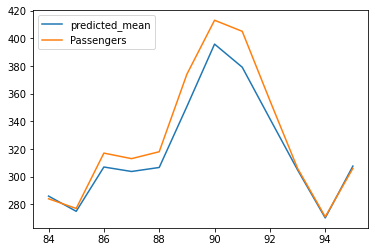

In [67]:
# plot predictions and actual values
pred.plot(legend=True)
test['Passengers'].plot(legend=True)

In [68]:
#Evaluate the model using MSE ,RMSE and MAE
# giving def for ERROR
def MAE(pred,org):
    err = np.abs((pred-org)/org)
    return np.mean(err)

In [69]:
# Calculate root mean squared error
from statsmodels.tools.eval_measures import rmse
rmse(test["Passengers"], pred)

12.962200626305338

In [70]:
AR_MAE=MAE(test["Passengers"], pred)
AR_MAE

0.028640628759898368

In [71]:
# Calculate mean squared error
mean_squared_error(test["Passengers"], pred)

168.01864507659047

# Forecasting using ARIMA model

In [72]:
# Forecast for the next 4 years
forecast = result.predict(start = len(airline), 
                          end = (len(airline)-1) + 4 * 12, 
                          typ = 'levels')

In [73]:
prediction=pd.DataFrame(forecast)
prediction

,predicted_mean
96,315.414025
97,303.549449
98,334.804465
99,332.080333
100,333.921553
101,377.339761
102,422.180295
103,404.401556
104,366.751957
105,328.796595


<AxesSubplot:>

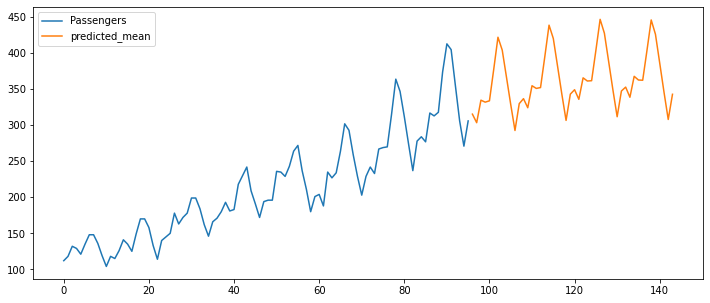

In [74]:
# Plot the forecast values
airline_1['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)